<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

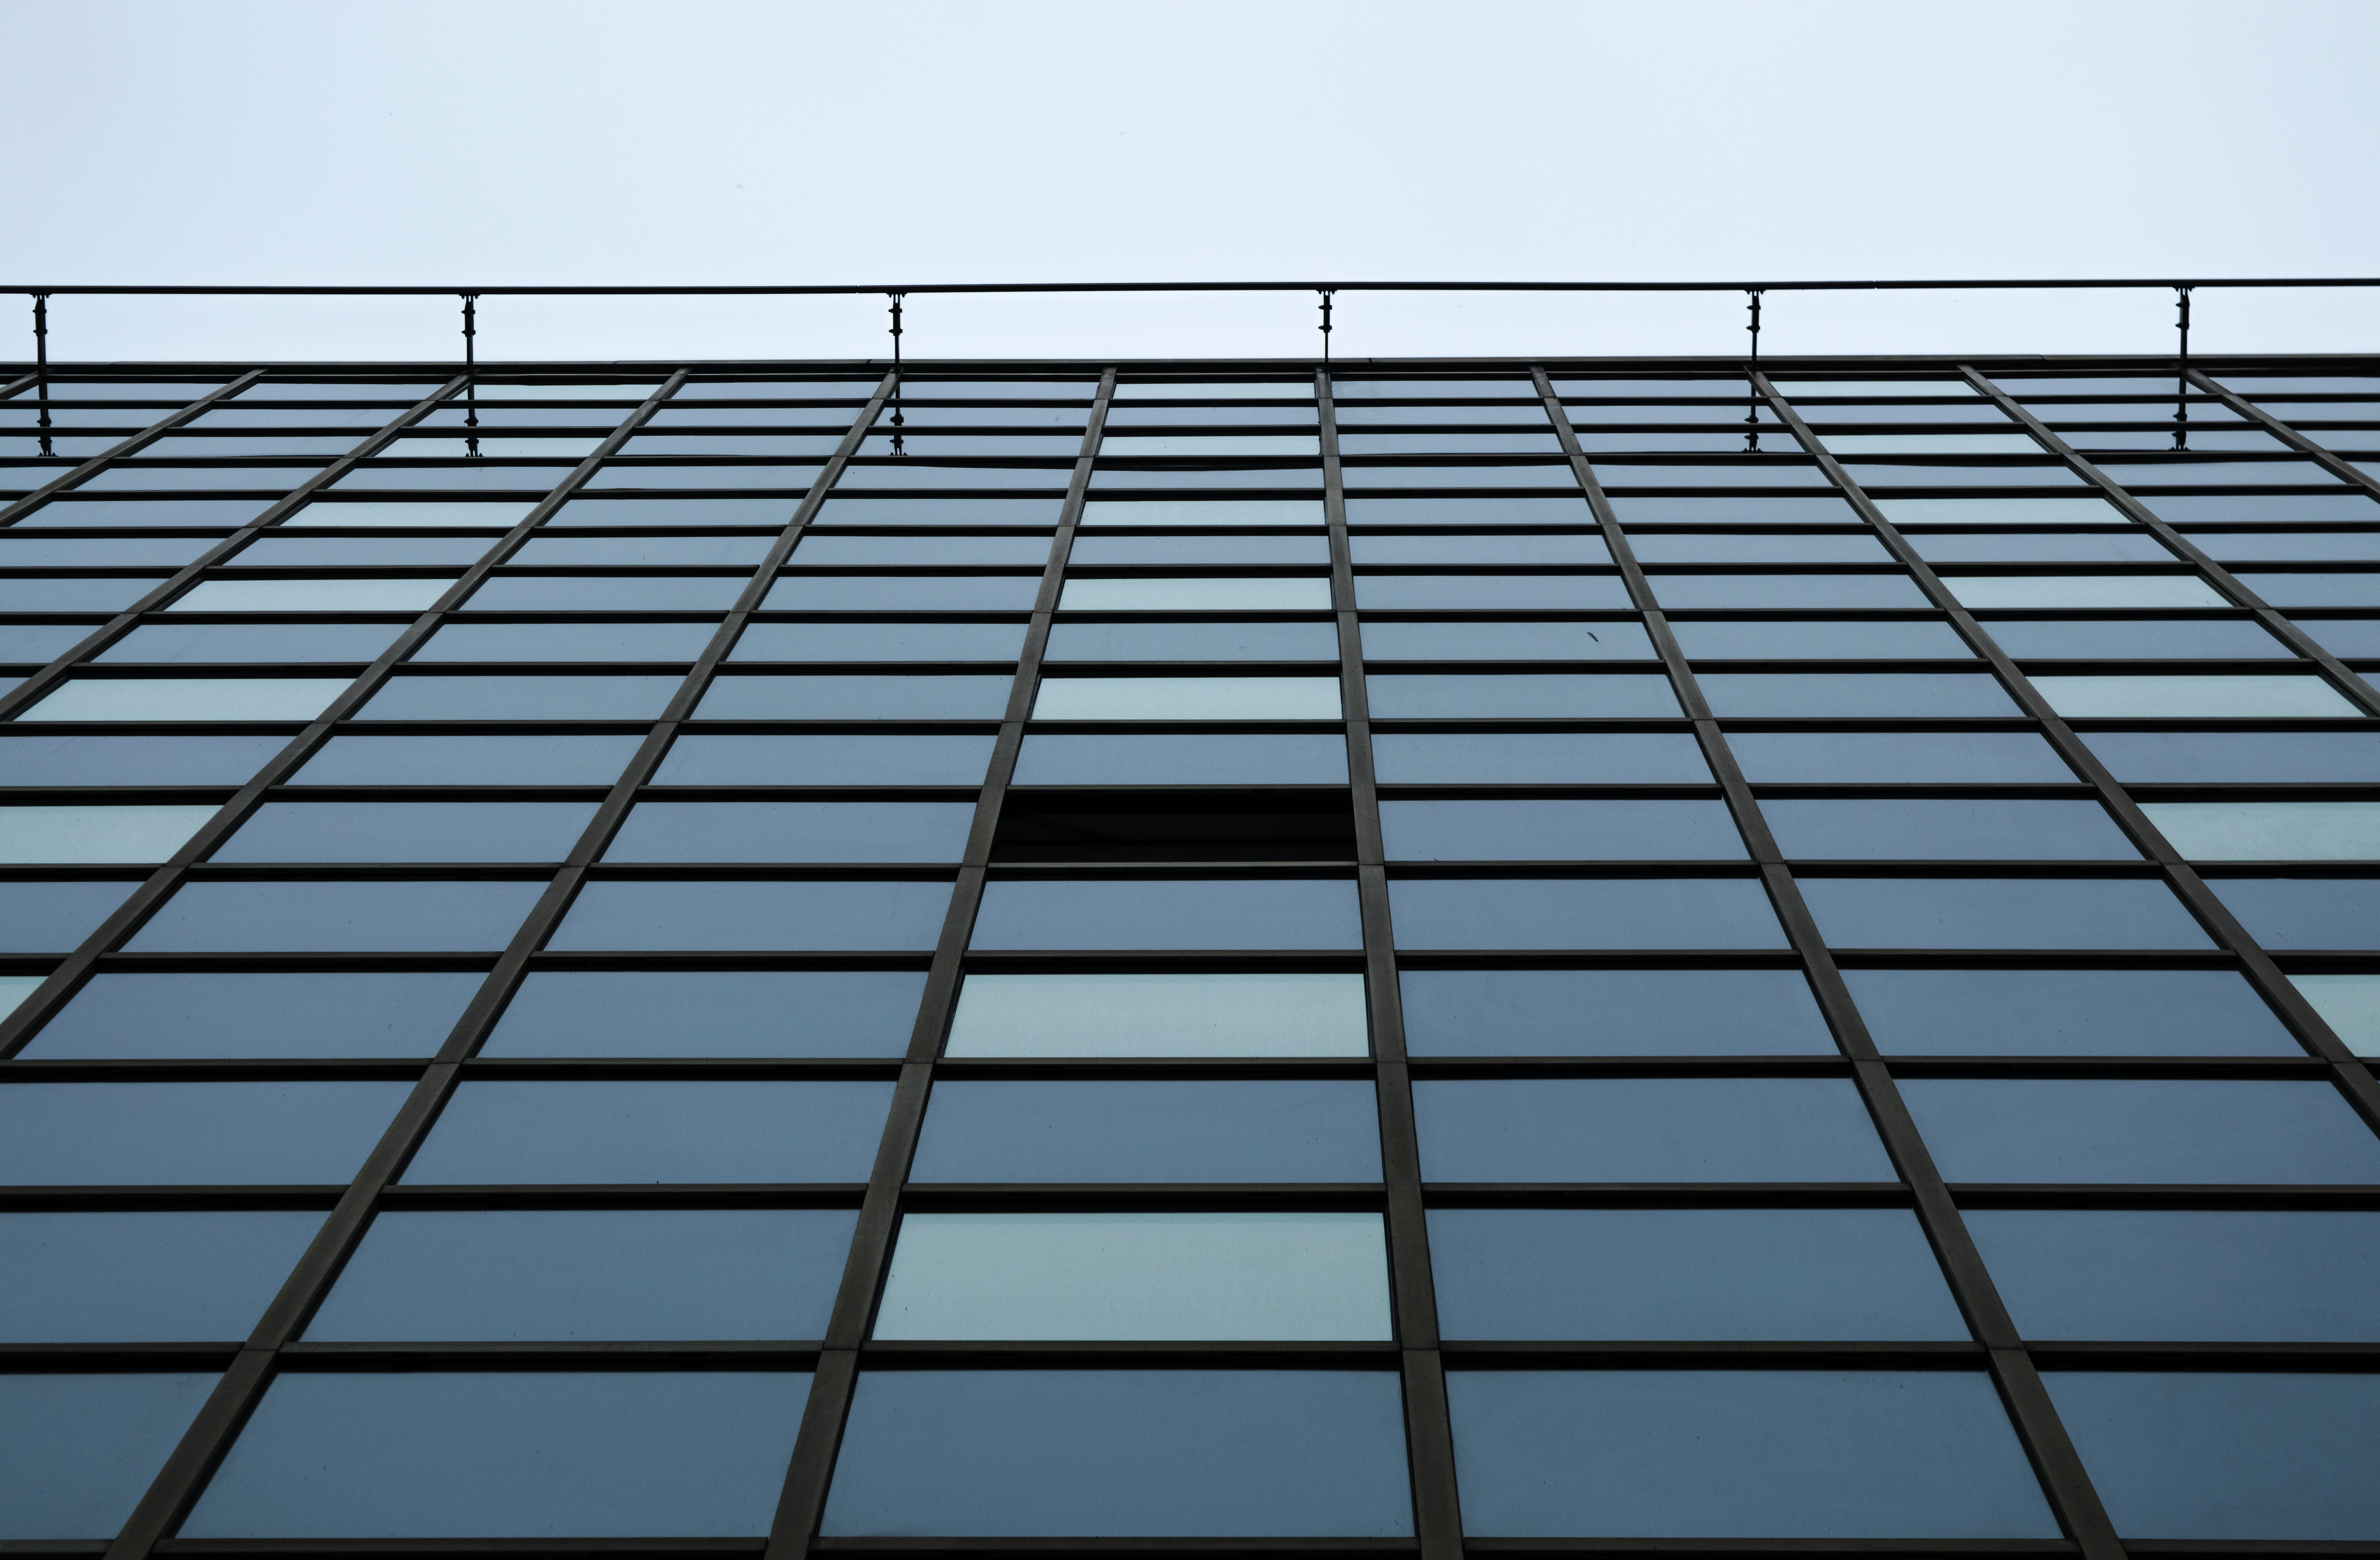[Image Source](https://unsplash.com/photos/3fliID795BQ)

## Table of Content
- **<a href="#2.1">Handling Missing Data</a>** 
  - **<a href="#2.1.1">Data Deletion</a>**
    - **<a href="#2.1.1.1">Deleting Rows</a>**
    - **<a href="#2.1.1.2">Deleting columns</a>**
  - **<a href="#2.1.2">Data Imputation</a>**
    - **<a href="#2.1.2.1">Time-Series Problem</a>**
    - **<a href="#2.1.2.2">General Problem</a>**
         - **<a href="#1.">Make missing values as one class</a>**
         - **<a href="#2.">Simple Imputer</a>**
         - **<a href="#3.">Multiple Imputation</a>**
         - **<a href="#4.">Back-fill or Forward-fill</a>**
         - **<a href="#5.">Replace using mean, median and mode</a>**
         - **<a href="#6.">Logistic Regression</a>**
         - **<a href="#7.">Linear Regression</a>**
         - **<a href="#8.">KNN Imputer</a>**

<a id="2.1"></a>
## 2.1 Handling Missing Data

There are several ways data can end up with missing values. 

**Example**: Someone with high income being surveyed may choose not to disclose or share their income.

**Note:** Python libraries represent missing numbers as `nan` ("not a number"). 

To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in `Pandas DataFrame`:
```python
isnull()
notnull()
dropna()
fillna()
replace()
interpolate()
```

You can detect missing values in each columns, and then provide the count of missing values in each column with command:

```python
missing_value_count = data.isnull().sum()
```

Most of the libraries such as `scikit-learn` will give an error during model building using data with missing values. So it is always recommended and needed to choose one of this strategies below.

**Missing data can be handeled in two ways:**

1) **Deletion of data**

2) **Imputation of data in the missing place**

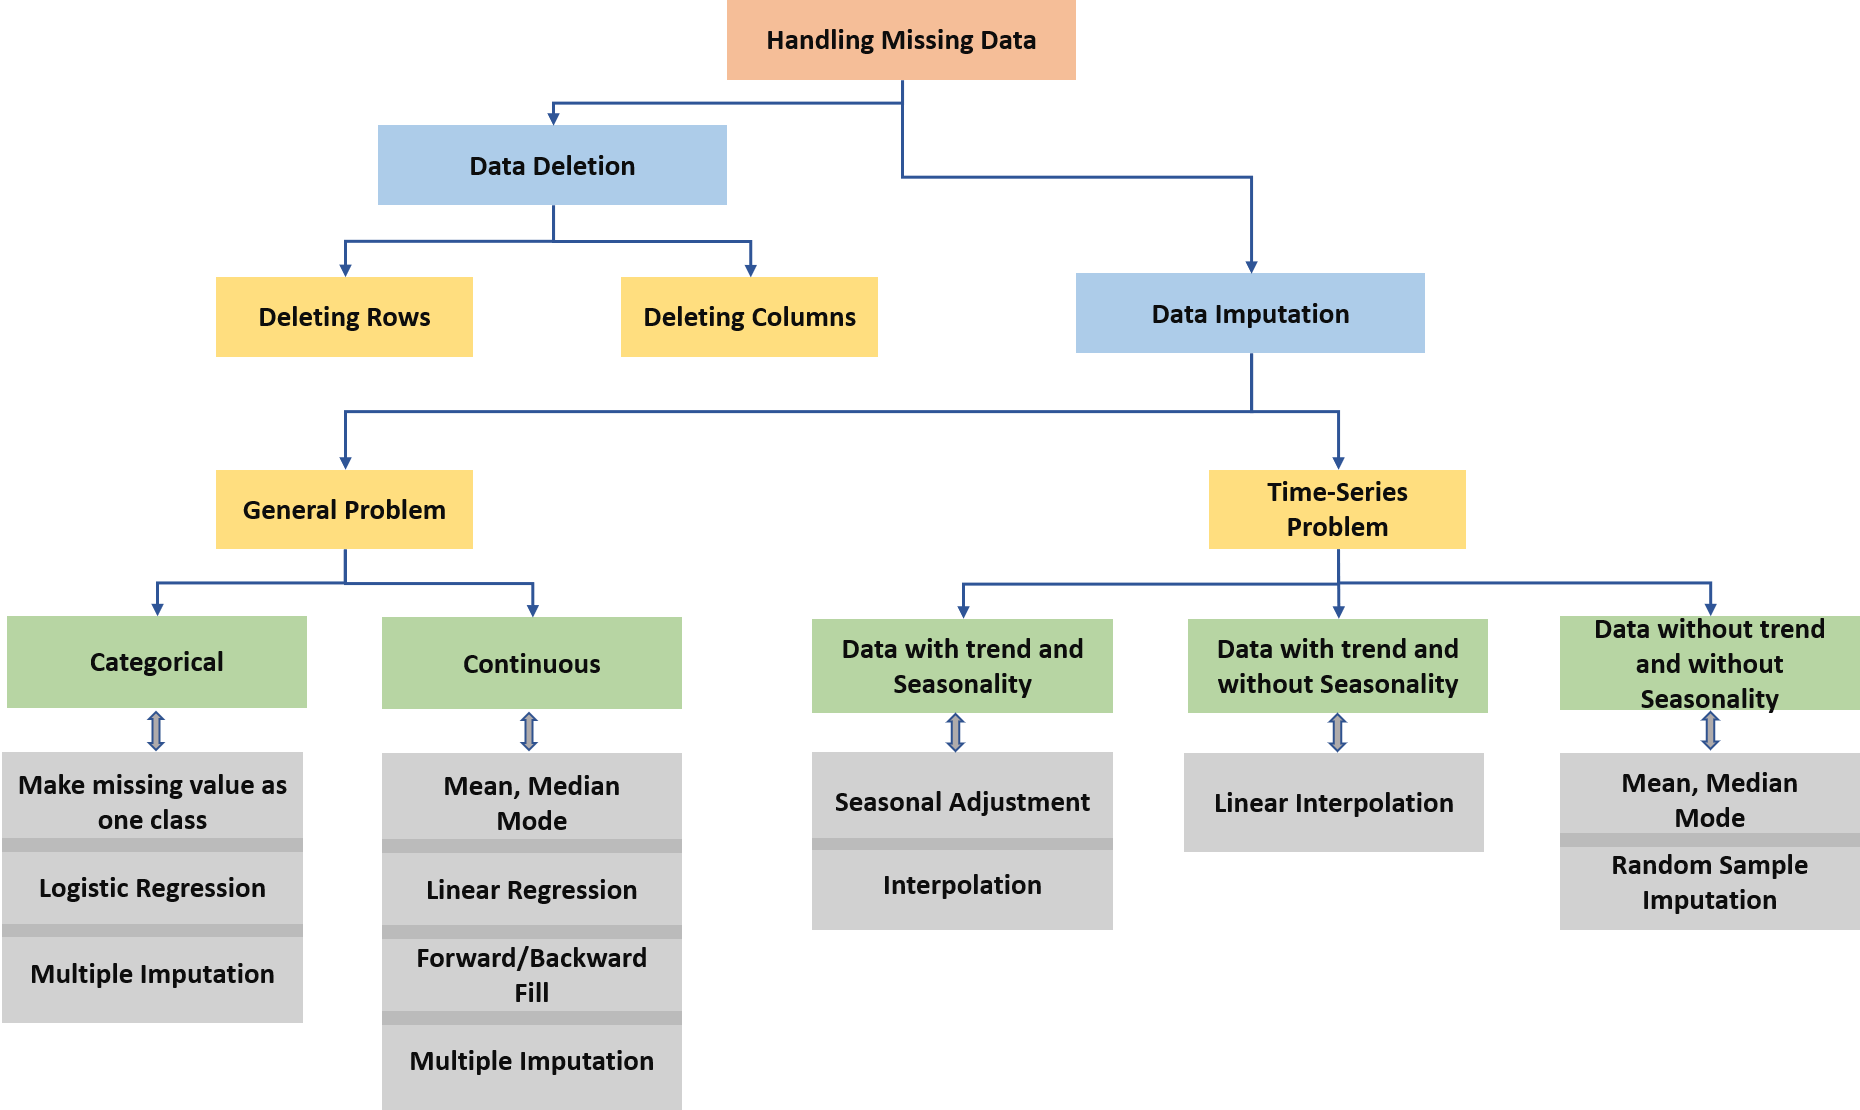

<a id="2.1.1"></a>
### 2.1.1 Data Deletion
Data can be deleted in three ways;

- Deleting Rows
- Deleting columns

**Example**

A simple dataset has created
```python
# importing pandas as pd 
import pandas as pd 
  
# importing numpy as np 
import numpy as np 
  
# dictionary of lists to store values
dict = {'Col1':[85, 90, 75, 51, 28, np.nan, 95], 
        'Col2': [54, 78, 91, 30, 45, 56, np.nan], 
        'Col3':[10, 87, 99, 86, 40, 80, 98],
        'Col4':[10, 47, 99, np.nan, 40, 80, 81],
        'Col5':[50, 87, 59, 25, 40, 54, 100]} 
  
# creating a dataframe from dictionary
data = pd.DataFrame(dict) 
```

In [1]:
# importing pandas as pd 
import pandas as pd 

# importing numpy as np 
import numpy as np 

# dictionary of lists to store values
dict = {'Col1':[85, 90, 75, 51, 28, np.nan, 95], 
        'Col2': [54, 78, 91, 30, 45, 56, np.nan], 
        'Col3':[10, 87, 99, 86, 40, 80, 98],
        'Col4':[10, 47, 99, np.nan, 40, 80, 81],
        'Col5':[50, 87, 59, 25, 40, 54, 100]} 

# creating a dataframe from dictionary
data = pd.DataFrame(dict) 
data

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,NaN,25
4,28.0,45.0,40,40.0,40
5,NaN,56.0,80,80.0,54
6,95.0,NaN,98,81.0,100


In [2]:
# using isnull() function   
data.isnull() 

,Col1,Col2,Col3,Col4,Col5
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
5,True,False,False,False,False
6,False,True,False,False,False


In [3]:
# using isnull() function   
data.isnull().sum() 

Col1    1
Col2    1
Col3    0
Col4    1
Col5    0
dtype: int64

<a id="2.1.1.1"></a>
#### 2.1.1.1 Deleting Rows (Listwise Deletion)

- `inplace` is `True` means it change the data as per the performed operation 
- By default `inplace` is `False`
- `axis = 0` by default for **row wise operation** and `axis = 1` for **column wise operation** 

```python
## Function to delete row wise null values
data.dropna(inplace=True)
```

In [4]:
df=data.dropna(axis=0)
df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
4,28.0,45.0,40,40.0,40


<a id="2.1.1.2"></a>
#### 2.1.1.2 Deleting columns

In general, it is always recommended to keep data rather than discard it. But sometimes you can drop column if the 60% of data is missing but only if that column is insignificant. 

**Note:** Previously its mentioned that imputation is always a preferable choice over the dropping.
```python
data.dropna(axis=1,inplace=True)
```

In [5]:
df=data.dropna(axis=1)
df

,Col3,Col5
0,10,50
1,87,87
2,99,59
3,86,25
4,40,40
5,80,54
6,98,100


<a id="2.1.2"></a>
### 2.1.2 Data Imputation

Data imputation process is always a preferable choice and divided into two types of problem;

- **Time-Series Problem**
- **General Problem**

<a id="2.1.2.1"></a>
#### Time-Series Problem

- `Mean`, `Median`, `Mode` and `Randam Sample Imputation` works well when data don't have both trend and seasonality.
- `Linear Interpolation` method works well for a time series with some trend but it is not suitable for the seasonal data.
- `Seasonal Adjustment + Linear Interpolation` works well for the data with both seasonality and trend.

**Note:** More we are going to discuss in Time-Series Module

<a id="2.1.2.2"></a>
#### General Problem

In general problem, we have encounter two type of data types;
- **Categorical**
- **Continuous**

**Note: Univariate vs. Multivariate Imputation**

- One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. `impute.SimpleImputer`). 
- By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. `impute.IterativeImputer`).

In [6]:
'''Here, we are going to use a `employees.csv` dataset to cover-up possible method of data imputation'''

# importing pandas package 
import pandas as pd

# loading dataframe from csv file 
data=pd.read_csv("Datasets/employees.csv")
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [7]:
## To check missing values in column wise
data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

<a id="1."></a>
##### 1. Make missing values as one class

In [8]:
'''Here we are going to fill all present null values in a Gender column with “Unknown_Gender”. 
After replacing there will be no null values in gender column'''

# filling a null values by fillna()  
data["Gender"].fillna("No Gender", inplace = True)  

## To check missing values in column wise
data.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [9]:
data["Gender"].value_counts()

Female       431
Male         424
No Gender    145
Name: Gender, dtype: int64

<a id="2."></a>
##### 2. Simple Imputer

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

data = pd.DataFrame([[10, 20],[np.nan, 30],[10, np.nan],[50, 40]])

print("Original Data :\n", data) 
print('\n','-'*50)

# missing_values type for imputation
SI = SimpleImputer(strategy="most_frequent")
data=SI.fit_transform(data)
print("Imputed Data :\n", data) 

Original Data :
       0     1
0  10.0  20.0
1   NaN  30.0
2  10.0   NaN
3  50.0  40.0

 --------------------------------------------------
Imputed Data :
 [[10. 20.]
 [10. 30.]
 [10. 20.]
 [50. 40.]]


<a id="3."></a>
##### 3. Multiple Imputation

**Note:** This estimator is still experimental in `sklearn`: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly `import enable_iterative_imputer`:

In [13]:
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer 
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]

# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


**It's needed newer verson of sklearn to use `from sklearn.impute import IterativeImputer`**.
In my case it works when 
```cmd
conda update anaconda
conda update scikit-learn
```
Then restart your jupyter kernal

'or'

**Auto Impute** library can be used
```cmd
pip install autoimpute
```
**[More Information](https://scikit-learn.org/stable/modules/impute.html) of SimpleImputer and IterativeImputer**

<a id="4."></a>
##### 4. Back-fill or Forward-fill
For Back-fill or forward-fill to propagate next or previous values respectively:
```python
#Back fill 
data.fillna(method='bfill')
#Forward-fill
data.fillna(method='ffill')
#one can also specify an axis to propagate (1 is for rows and 0 is for columns)
data.fillna(method='bfill', axis=1)
```

In [14]:
# importing pandas as pd 
import pandas as pd 

# importing numpy as np 
import numpy as np 

# dictionary of lists to store values
dict = {'Col1':[85, 90, 75, 51, 28, np.nan, 95], 
        'Col2': [54, 78, 91, 30, 45, 56, np.nan], 
        'Col3':[10, 87, 99, 86, 40, 80, 98],
        'Col4':[10, 47, 99, np.nan, 40, 80, 81],
        'Col5':[50, 87, 59, 25, 40, 54, 100]} 

# creating a dataframe from dictionary
data = pd.DataFrame(dict) 
print("Original Data :\n", data) 
print('\n','-'*50)

#Back fill 
new_df=data.fillna(method='bfill')
new_df

Original Data :
    Col1  Col2  Col3  Col4  Col5
0  85.0  54.0    10  10.0    50
1  90.0  78.0    87  47.0    87
2  75.0  91.0    99  99.0    59
3  51.0  30.0    86   NaN    25
4  28.0  45.0    40  40.0    40
5   NaN  56.0    80  80.0    54
6  95.0   NaN    98  81.0   100

 --------------------------------------------------


,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,40.0,25
4,28.0,45.0,40,40.0,40
5,95.0,56.0,80,80.0,54
6,95.0,NaN,98,81.0,100


In [15]:
#one can also specify an axis to propagate (1 is for rows and 0 is for columns)
new_df=data.fillna(method='bfill', axis=1)
new_df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10.0,10.0,50.0
1,90.0,78.0,87.0,47.0,87.0
2,75.0,91.0,99.0,99.0,59.0
3,51.0,30.0,86.0,25.0,25.0
4,28.0,45.0,40.0,40.0,40.0
5,56.0,56.0,80.0,80.0,54.0
6,95.0,98.0,98.0,81.0,100.0


In [16]:
#Forward-fill
new_df=data.fillna(method='ffill')
new_df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,99.0,25
4,28.0,45.0,40,40.0,40
5,28.0,56.0,80,80.0,54
6,95.0,56.0,98,81.0,100


<a id="5."></a>
##### 5. Replace using mean, median and mode

In [18]:
## Mean
mean = data.mean()
df=data.fillna(mean)
df

,Col1,Col2,Col3,Col4,Col5
0,85.000000,54.0,10,10.0,50
1,90.000000,78.0,87,47.0,87
2,75.000000,91.0,99,99.0,59
3,51.000000,30.0,86,59.5,25
4,28.000000,45.0,40,40.0,40
5,70.666667,56.0,80,80.0,54
6,95.000000,59.0,98,81.0,100


In [19]:
## Median
median = data.median()
df=data.fillna(median)
df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,63.5,25
4,28.0,45.0,40,40.0,40
5,80.0,56.0,80,80.0,54
6,95.0,55.0,98,81.0,100


In [20]:
## Mode
mode = data.mode()
df=data.fillna(mode)
df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,80.0,25
4,28.0,45.0,40,40.0,40
5,95.0,56.0,80,80.0,54
6,95.0,NaN,98,81.0,100


<a id="6."></a>
##### 6. Logistic Regression
It is a statistical model that uses a logistic function to model a dependent variable. The dependent variable is a binary values labeled “0” and “1”.

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Imupte mean values
imp=Imputer(missing_values="NaN", strategy="mean", axis=0)

logmodel = LogisticRegression()

## Pipeline steps
steps=[('imputation',imp),('logistic_regression',logmodel)]

pipeline=Pipeline(steps)

## Using train_test_split to split the dataset
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting train and test data
pipeline.fit(X_train, Y_train)

y_pred=pipeline.predict(X_test)
pipeline.score(X_test, Y_test)
```

<a id="7."></a>
##### 7. Linear Regression
It is a statistical model that uses a linear predictor function to model a dependent variable. The relationship between the dependent variable y and the inputs x is linear. 

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearModel
from sklearn.model_selection import train_test_split

## Imupte mean values
imp=Imputer(missing_values="NaN", strategy="mean", axis=0)

linearmodel = LinearModel()

## Pipeline steps
steps=[('imputation',imp),('linear_regression',linearmodel)]

pipeline=Pipeline(steps)

## Using train_test_split to split the dataset
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting train and test data
pipeline.fit(X_train, Y_train)

y_pred=pipeline.predict(X_test)
pipeline.score(X_test, Y_test)
```

<a id="8."></a>
##### 8. KNN Imputer
- The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. 
- By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. 
- Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

**Note:** The method requires the selection of the number of nearest neighbors, and a distance metric. KNN can predict both discrete attributes (the most frequent value among the k nearest neighbors) and continuous attributes (the mean among the k nearest neighbors)

**The distance metric varies according to the type of data:**
1. Continuous Data: The commonly used distance metrics for continuous data are Euclidean, Manhattan and Cosine
2. Categorical Data: Hamming distance is generally used in this case.

In [21]:
import numpy as np
from sklearn.impute import KNNImputer

## Dataset
data = [[1, 5, np.nan], [3, np.nan, 7], [np.nan, 5, 5], [8, 7, 7]]

## Applying KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(data)

array([[1., 5., 6.],
       [3., 5., 7.],
       [2., 5., 5.],
       [8., 7., 7.]])